In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [16]:
song_data = pd.read_csv('arthurwu_project1_sampledSongs_urls.csv')

In [17]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  698 non-null    object
 1   song_title   698 non-null    object
 2   year         698 non-null    int64 
 3   lyrics_url   698 non-null    object
 4   lyrics_text  698 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.4+ KB


In [18]:
#cleaning and preprocessing
#remove all the non english/numeric characters from the text 
song_data['lyrics_text']=song_data['lyrics_text'].str.replace("'",'',regex=True) # remove apostrophies
song_data['lyrics_text']=song_data['lyrics_text'].str.replace('"','',regex=True) # remove quotations
song_data['lyrics_text']=song_data['lyrics_text'].str.replace('[^A-Za-z0-9 ]',' ',regex=True) # remove other non-word characters
song_data['lyrics_text']=song_data['lyrics_text'].str.replace('\s+',' ',regex=True) # remove newline characters
song_data['lyrics_text']=song_data['lyrics_text'].apply(lambda x: " ".join(x.lower() for x in x.split())) # convert all to lowercase


# remove stopwords from lyrics text
stop_words = stopwords.words('english')
song_data['lyrics_text'] = song_data['lyrics_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


#converting to stem words
stems = PorterStemmer()
song_data['lyrics_text'] = song_data['lyrics_text'].apply(lambda x: " ".join([stems.stem(word) for word in x.split()]))

song_data.head()

,artist_name,song_title,year,lyrics_url,lyrics_text
0,Woody Guthrie,Blowing Down The Old Dusty Road (I Ain't Going...,1940,https://www.azlyrics.com/lyrics/woodyguthrie/b...,im blowin old dusti road im blowin old dusti r...
1,Woody Guthrie,"Tom Joad, Part 2",1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,joad roll away jungl camp cook stew hungri lit...
2,Woody Guthrie,The Great Dust Storm (Dust Storm Disaster),1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,14th day april 1935 struck worst dust storm ev...
3,Woody Guthrie,Dust Bowl Refugee,1940,https://www.azlyrics.com/lyrics/woodyguthrie/d...,im dust bowl refuge dust bowl refuge dust bowl...
4,Woody Guthrie,Vigilante Man,1940,https://www.azlyrics.com/lyrics/woodyguthrie/v...,seen vigilant man seen vigilant man seen vigil...


In [19]:
# prepare columns and variables
#Get total_word count
song_data['total_words'] = song_data['lyrics_text'].apply(lambda x: len(str(x).split(" ")))

#Get unique_word count
song_data['unique_words'] = song_data['lyrics_text'].apply(lambda x: len(set(str(x).split(" "))))

#Get ratio between unique_word count and total_word_count
song_data['ratio_unique_total'] = song_data['unique_words']/song_data['total_words']

song_data.head()

,artist_name,song_title,year,lyrics_url,lyrics_text,total_words,unique_words,ratio_unique_total
0,Woody Guthrie,Blowing Down The Old Dusty Road (I Ain't Going...,1940,https://www.azlyrics.com/lyrics/woodyguthrie/b...,im blowin old dusti road im blowin old dusti r...,202,42,0.207921
1,Woody Guthrie,"Tom Joad, Part 2",1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,joad roll away jungl camp cook stew hungri lit...,184,102,0.554348
2,Woody Guthrie,The Great Dust Storm (Dust Storm Disaster),1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,14th day april 1935 struck worst dust storm ev...,146,120,0.821918
3,Woody Guthrie,Dust Bowl Refugee,1940,https://www.azlyrics.com/lyrics/woodyguthrie/d...,im dust bowl refuge dust bowl refuge dust bowl...,97,44,0.453608
4,Woody Guthrie,Vigilante Man,1940,https://www.azlyrics.com/lyrics/woodyguthrie/v...,seen vigilant man seen vigilant man seen vigil...,111,63,0.567568


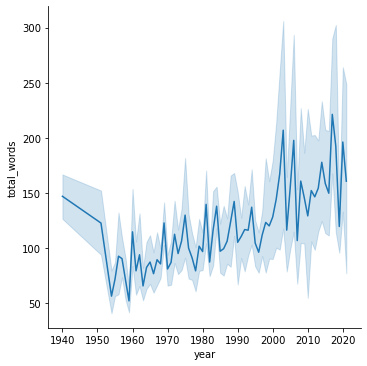

In [20]:
# relplot total_words as a function of year
sns.relplot(data=song_data, x='year', y='total_words', kind='line')

In [21]:
# apply min-max scaling and store in new column
scaler = MinMaxScaler()

song_data["total_words_scaled"] = scaler.fit_transform(song_data[["total_words"]])
song_data.head()

,artist_name,song_title,year,lyrics_url,lyrics_text,total_words,unique_words,ratio_unique_total,total_words_scaled
0,Woody Guthrie,Blowing Down The Old Dusty Road (I Ain't Going...,1940,https://www.azlyrics.com/lyrics/woodyguthrie/b...,im blowin old dusti road im blowin old dusti r...,202,42,0.207921,0.302711
1,Woody Guthrie,"Tom Joad, Part 2",1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,joad roll away jungl camp cook stew hungri lit...,184,102,0.554348,0.275602
2,Woody Guthrie,The Great Dust Storm (Dust Storm Disaster),1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,14th day april 1935 struck worst dust storm ev...,146,120,0.821918,0.218373
3,Woody Guthrie,Dust Bowl Refugee,1940,https://www.azlyrics.com/lyrics/woodyguthrie/d...,im dust bowl refuge dust bowl refuge dust bowl...,97,44,0.453608,0.144578
4,Woody Guthrie,Vigilante Man,1940,https://www.azlyrics.com/lyrics/woodyguthrie/v...,seen vigilant man seen vigilant man seen vigil...,111,63,0.567568,0.165663


Coefficient for Year:  0.001910473696889839


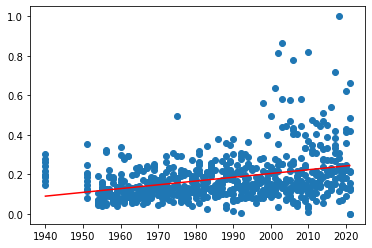

In [22]:
# simple linear regression (x = year, y = total words minmax)
x = song_data["year"].values.reshape(-1, 1)
y = song_data["total_words_scaled"].values.reshape(-1, 1)

linear_model = LinearRegression()  # create object for the class
linear_model.fit(x, y)  # perform linear regression
Y_pred = linear_model.predict(x)  # make predictions

# Get coefficient for Year
print("Coefficient for Year: ", linear_model.coef_[0][0])


# plot linear regression model
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.savefig("project2_fig1_arthurwu.pdf")
plt.show()

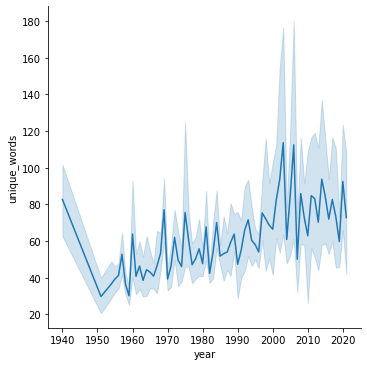

In [23]:
### unique words ###

# relplot unique_words as a function of year
sns.relplot(data=song_data, x='year', y='unique_words', kind='line')

In [24]:
# apply min-max scaling and store in new column
scaler = MinMaxScaler()

song_data["unique_words_scaled"] = scaler.fit_transform(song_data[["unique_words"]])
song_data.head()

,artist_name,song_title,year,lyrics_url,lyrics_text,total_words,unique_words,ratio_unique_total,total_words_scaled,unique_words_scaled
0,Woody Guthrie,Blowing Down The Old Dusty Road (I Ain't Going...,1940,https://www.azlyrics.com/lyrics/woodyguthrie/b...,im blowin old dusti road im blowin old dusti r...,202,42,0.207921,0.302711,0.111413
1,Woody Guthrie,"Tom Joad, Part 2",1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,joad roll away jungl camp cook stew hungri lit...,184,102,0.554348,0.275602,0.274457
2,Woody Guthrie,The Great Dust Storm (Dust Storm Disaster),1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,14th day april 1935 struck worst dust storm ev...,146,120,0.821918,0.218373,0.323370
3,Woody Guthrie,Dust Bowl Refugee,1940,https://www.azlyrics.com/lyrics/woodyguthrie/d...,im dust bowl refuge dust bowl refuge dust bowl...,97,44,0.453608,0.144578,0.116848
4,Woody Guthrie,Vigilante Man,1940,https://www.azlyrics.com/lyrics/woodyguthrie/v...,seen vigilant man seen vigilant man seen vigil...,111,63,0.567568,0.165663,0.168478


Coefficient for Year:  0.0016111419127073827


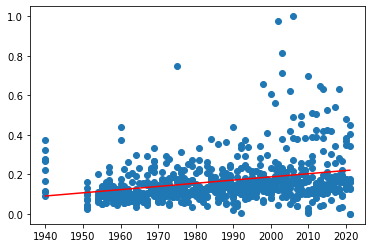

In [25]:
# simple linear regression (x = year, y = unique words minmax)
x = song_data["year"].values.reshape(-1, 1)
y = song_data["unique_words_scaled"].values.reshape(-1, 1)

linear_model = LinearRegression()  # create object for the class
linear_model.fit(x, y)  # perform linear regression
Y_pred = linear_model.predict(x)  # make predictions

# Get coefficient for Year
print("Coefficient for Year: ", linear_model.coef_[0][0])


# plot linear regression model
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.savefig("project2_fig2_arthurwu.pdf")
plt.show()

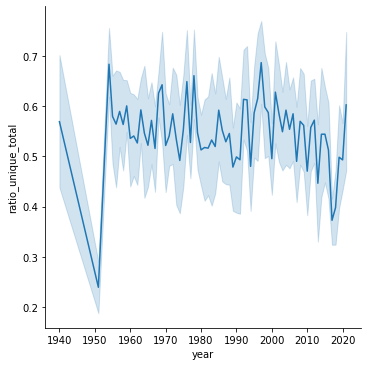

In [26]:
### Ratio between unique words and total words ###

# relplot ratio_unique_total as a function of year
sns.relplot(data=song_data, x='year', y='ratio_unique_total', kind='line')

In [27]:
# apply min-max scaling and store in new column
scaler = MinMaxScaler()

song_data["ratio_unique_total_scaled"] = scaler.fit_transform(song_data[["ratio_unique_total"]])
song_data.head()

,artist_name,song_title,year,lyrics_url,lyrics_text,total_words,unique_words,ratio_unique_total,total_words_scaled,unique_words_scaled,ratio_unique_total_scaled
0,Woody Guthrie,Blowing Down The Old Dusty Road (I Ain't Going...,1940,https://www.azlyrics.com/lyrics/woodyguthrie/b...,im blowin old dusti road im blowin old dusti r...,202,42,0.207921,0.302711,0.111413,0.093600
1,Woody Guthrie,"Tom Joad, Part 2",1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,joad roll away jungl camp cook stew hungri lit...,184,102,0.554348,0.275602,0.274457,0.490027
2,Woody Guthrie,The Great Dust Storm (Dust Storm Disaster),1940,https://www.azlyrics.com/lyrics/woodyguthrie/t...,14th day april 1935 struck worst dust storm ev...,146,120,0.821918,0.218373,0.323370,0.796215
3,Woody Guthrie,Dust Bowl Refugee,1940,https://www.azlyrics.com/lyrics/woodyguthrie/d...,im dust bowl refuge dust bowl refuge dust bowl...,97,44,0.453608,0.144578,0.116848,0.374748
4,Woody Guthrie,Vigilante Man,1940,https://www.azlyrics.com/lyrics/woodyguthrie/v...,seen vigilant man seen vigilant man seen vigil...,111,63,0.567568,0.165663,0.168478,0.505155


Coefficient for Year:  -0.00046804499417087093


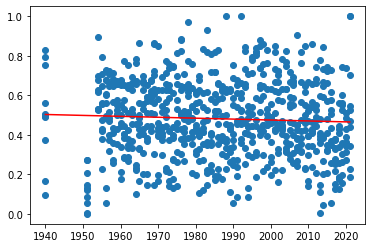

In [28]:
# simple linear regression (x = year, y = ratio_unique_total minmax)
x = song_data["year"].values.reshape(-1, 1)
y = song_data["ratio_unique_total_scaled"].values.reshape(-1, 1)

linear_model = LinearRegression()  # create object for the class
linear_model.fit(x, y)  # perform linear regression
Y_pred = linear_model.predict(x)  # make predictions

# Get coefficient for Year
print("Coefficient for Year: ", linear_model.coef_[0][0])


# plot linear regression model
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.savefig("project2_fig3_arthurwu.pdf")
plt.show()